# 統計用語の勉強

階級  
ある生のデータをある幅をもって整理したものについて、分類した値の幅のことを**階級**という。

階級値
階級の中央値のことを階級値という。


## 正規分布とは


平均を$\mu$、分散を$\sigma^2$（標準偏差を$\sigma$）とすると、正規分布にしたがう確率変数$X$は次の確率密度を持つ。
$$
N(x | \mu,\sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{\frac{1}{2\sigma^2}(x-\mu)^2}
$$

一般的に次に発生する値が$x_1 \lt X \lt x_2$である確率は、次の式で表される。
$$
P[x_1 \lt X \lt x_2] = \int_{x_1}^{x_2} N(x | \mu,\sigma^2) dx
$$
全区間では確率は1になることを示します。
$$
\int_{-\infty}^{\infty} N(x | \mu,\sigma^2) dx = 1
$$

平均と分散は定義から以下の式が成立する。
$$
平均: E[X] = \int_{-\infty}^{\infty} xN(x | \mu,\sigma^2) dx = \mu \\
分散: V[X] = E[(X - \mu)^2]
=  \int_{-\infty}^{\infty} (x - \mu)^2N(x | \mu,\sigma^2) dx = \sigma^2
$$


5.0
1.0
8.0
1.0
10.0
4.0


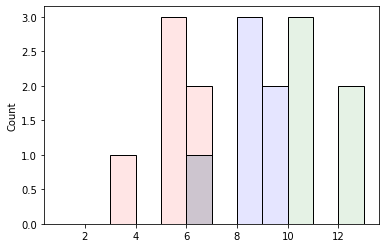

In [27]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

x1999 = np.array([6, 3, 5, 6, 5, 5])
x2000 = x1999 + 3
x2001 = x1999 * 2

print(np.mean(x1999))
print(np.var(x1999))

print(np.mean(x2000))
print(np.var(x2000))

print(np.mean(x2001))
print(np.var(x2001))

sns.histplot(x1999, color='red', alpha=0.1, bins=range(1, 14))
sns.histplot(x2000, color='blue', alpha=0.1, bins=range(1, 14))
sns.histplot(x2001, color='green', alpha=0.1, bins=range(1, 14))

plt.show()


<AxesSubplot:ylabel='Count'>

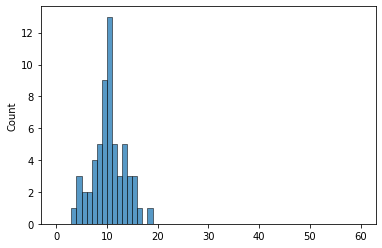

In [64]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# サイコロをn回投げて6がでる回数をプロット
N = 60

es = np.array([])

for n in range(N):
    e = np.random.randint(1, 7, N)
    es = np.append(es, (e == 6).sum())
    #e = np.random.randint(0, 2, N)
    #es = np.append(es, (e == 1).sum())
es
sns.histplot(data=es, bins=range(0, N+1))

## 不偏性とは
とある推定値が同じ観測数で何度も何度も繰り返し、その平均をとっていくと、真の母数に近づくことを示す。

## 一致性とは
とある推定値が一回の推定でも、でその観測数を大きくすれば、真の母数に近づくことを示す。



標本値を$\{X\}_{i=1}^N$とするとき、標本平均値を$\bar{X}$とすると、標本分散は以下で定義される。
$$
\frac{1}{N} \sum_{i=1}^{N} (X_i - \bar{X})^2
$$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## 標本分散の一致性の確認

In [ ]:
np.random.seed(42)

KMAX = 1000

mu = 10
std = 5

v = pd.DataFrame(columns=['x', 'v'])

for k in range(1, KMAX):
    r = np.random.normal(mu, std, k)
    v = np.var(r, ddof=0)
    s = pd.Series([k, v], index=['x', 'v'])
    v = dfv.append(s, ignore_index=True)
plt.figure(figsize=(10, 3.5))
plt.axhline(25, ls = '--', color = 'red', label = True)
sns.lineplot(data=v, x='x', y='v')
plt.show()



## 標本分散に不偏性がないことの確認

In [ ]:
np.random.seed(42)

NMAX = 200
K = 1000

mu = 10
std = 5

ev = []
x = []
g = pd.DataFrame(columns=['x', 'ev', 'bias'])
for n in range(10, NMAX):
    v = []
    for i in range(K):
        r = np.random.normal(mu, std, n)
        v.append(np.var(r, ddof = 0)) # ddof=0で標本分散
    ev = np.mean(v)
    bias = 25 -1 / n * 25
    s = pd.Series([n, ev, bias], index=['x', 'ev', 'bias'])
    g = g.append(s, ignore_index=True)

plt.figure(figsize=(10, 3.5))
plt.axhline(25, ls = '--', color = 'red', label = True)
sns.lineplot(data=g, x='x', y='ev')
sns.lineplot(data=g, x='x', y='bias')
plt.show()

実際に標本分散の平均を計算すると
$$
E[\frac{1}{N} \sum_{i=1}^{N} (X_i - \bar{X})^2] = \frac{N-1}{N}\sigma^2 \\
= \sigma^2 - \frac{1}{N} \sigma^2
$$

In [ ]:
x = np.random.normal(10, 5, 10)
print(x)

In [ ]:
df = pd.DataFrame({"A": [1, 2, 3], "B": [1, 2, 3]})
df

In [ ]:
df2 = pd.DataFrame({"A": [4, 5, 6], "B": [4, 5, 6]})
ret = df.append(df2, ignore_index=True)
ret